# Class 10: Data visualization

Plan for today:
- Review and discuss additional features of using matplotlib to visualize data
- If there is time: Data visualization using seaborn



In [19]:
import YData

# YData.download.download_class_code(10)   # get class code    
# YData.download.download_class_code(10, True)  # get the code with the answers 


YData.download_data("movies.csv")
YData.download_data("movie_ratings.csv")


The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `movie_ratings.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [20]:
## You can get the fifth homework by uncommenting and running the code below.
#YData.download.download_homework(5)  # downloads the homework 

If you are using colabs, you should run the code below.

In [21]:
# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Warm-up exercises: Bechdel movies revisited

For some warm-up exercises, let's practice manipulating data with pandas using the Bechdel data. 

The code below reads in the Bechdel into a pandas DataFrame named `movies` from a .csv file, and reduces the data to a subset of relevant columns (this is the same code as was used in previous classes, although hopefully now you understand what it is doing!). 

In [23]:

movies = pd.read_csv("movies.csv")

col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']

movies =   movies[col_names_to_keep]

#movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])

movies.head()


,year,imdb,title,clean_test,binary,budget,domgross,budget_2013,domgross_2013,decade_code,imdb_id,rated,imdb_rating,runtime,imdb_votes
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,13000000,25682380.0,13000000,25682380.0,1.0,1711425,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,45000000,13414714.0,45658735,13611086.0,1.0,1343727,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,20000000,53107035.0,20000000,53107035.0,1.0,2024544,R,8.3,134 min,"143,446"
3,2013,tt1272878,2 Guns,notalk,FAIL,61000000,75612460.0,61000000,75612460.0,1.0,1272878,R,6.8,109 min,"87,301"
4,2013,tt0453562,42,men,FAIL,40000000,95020213.0,40000000,95020213.0,1.0,453562,PG-13,7.6,128 min,"43,608"


### Warm-up exercise 1 

Starting with the `movies` DataFrame create a DataFrame called `bechdel_stats` that has statistics calculated separately for movies that failed and movies that passed the Bechdel test; i.e., `bechdel_stats` DataFrame should have two rows, the first row for movies that failed the Bechdel test and one for movies that passed the Bechdel test. 

The `bechdel_stats` should also have the following columns: 

- `mean_revenue`: The mean revenue (domgross_2013) in 2013 inflation adjusted dollars
- `mean_budget`: The mean budget (budget_2013) in 2013 inflation adjusted dollars
- `n`: The number of movies 




In [2]:
# 1: Get mean budget, mean revenue, and number of movies for movies that passed and did not pass the Bechdel test 





### Warm-up exercise 2

Now calculate the ratio of the mean budgets of movies that failed the Bechdel test to the mean budget of movies that passed the Bechdel test; i.e., you should calculate $$\frac{mean-budget-failed}{mean-budget-passed}$$

Also, please think about what this value tells you. 


### Warm-up exercise 3

Next add a column to the `bechdel_stats` DataFrame called `prop` that has the proportion of movies that failed, and passed the Bechdel test; i.e., the first row of the `prop` column should have the proportion of movies that failed the Bechdel test and the second row should have the proportion of movies that passed the Bechdel test. 


### Warm-up exercise 3

Finally, the code below creates a DataFrame called `movie_ratings` that has ratings of 651 movies from the website [Rotten Tomatoes](https://www.rottentomatoes.com/), and reduces the data down to the following three columns:

1. `imdb`: A ID that uniquely identifies each movie
2. `audience_score`: The mean score that audience members gave each movie
3. `critics_score`: The mean score that critics gave each movie.

Please do the following with this `movie_ratings` DataFrame:

1. Use an inner join to join/merge the Bechdel movies data (i.e., the `movies` DataFrame) with this new `movie_ratings` DataFrame using the `imdb` column. Save this joined DataFrame to the name `merged_data`.  
2. Select only columns `binary`, `audience_score`, `critics_score` from the `merged_data` DataFrame.  
3. Calculate mean audience and critics scores separately for movies that passed and failed the bechdel test.   

Do movies that fail the Bechdel test seem to have higher audience and/or critics' scores? 


In [27]:
movie_ratings = pd.read_csv("movie_ratings.csv")

movie_ratings = movie_ratings[["imdb", "audience_score", "critics_score"]]

movie_ratings.head(3)


,imdb,audience_score,critics_score
0,tt1869425,73,45
1,tt0205873,81,96
2,tt0118111,91,91


## Data visualization!

Let's now review and continue using matplotlib package to visualize data as well as explore additional features of this package. 


### Reviewing visualizing quantitative data

Let's begin by reviewing visualizing quantitative data. In particular, let's create visualizations to view the distribution of budgets of movies that passed and failed the Bechdel test (rather than just looking at the mean budgets as we did in the warm-up exercises).

In order to compare movies that passed and failed the Bechdel test, let's split our `movies` DataFrame into two DataFrames called:

1. `bechdel_passed_df`: This DataFrame has only movies that passed the Bechdel test
2. `bechdel_failed_df`: This DataFrame has only movies that failed the Bechdel test

You can do this using Boolean masking and/or the `.query()` method.


In [3]:
# Created DataFrames for movies that passed and failed the Bechdel test using Boolean subsetting




# Alternatively, use the .query() method to create these DataFrames






#### Comparing movies using boxplots

Now that we have the `bechdel_passed_df` and `bechdel_failed_df` DataFrames, let's use side-by-side boxplots to compare the budgets (in 2013 dollars).

Do the budgets seem similar? 


#### Comparing movies using overlapping histograms

We can also compare the budgets using overlapping histograms. To do this, it will be useful to set the following properties:

1. `alpha = .5`: Make the histograms have some transparency.
2. `density =  True`: Normalize the histograms to have a area equal to 1 to account for the fact that there are different numbers of movies that passed and failed the Bechdel test in our dataset. 

Do you think the boxplots or the histograms better contrasts the budgets of movies that passed and failed the Bechdel test? 


### Movie revenue as a function of year

Using our `movies` DataFrame, let's create a DataFrame called `year_revenue` that has a row for each year a movie was released (`year` column) and has the following variables:

1. `mean_revenue_2013`: The mean revenue in 2013 inflation adjusted dollars
2. `mean_revenue`: The mean revenue in non-inflation adjusted dollars
3. `n`: The number of movies in our data set for each year


Once we have created the `year_revenue`, plot the `mean_revenue_2013` and the `mean_revenue` as a function of the year. 

Question: What is the data so choppy prior to the 1990's


In [4]:

# Create the year_revenue DataFrame






# Visualize the time series








## Scatter plots

We can create a simple scatter plots using: `plt.plot()`

For more complex scatter plots we can use: `plot.scatter()`

Let's start by looking at the simple `plt.plot()`

In [5]:
# Create a basic scatter plot of budget vs. revenue






Let's now create a DataFrame called `movies2` which is the same as our `movies` DataFrame but it also has an additional column called `after2000`. We will use this column to plots points before the year 2000 in a different color than points after 2000. 

In particular, the `after2000` column should be set to the string "red" for movies that occur before 2000 and to the string "green" for points that occured after 2000. 

We can then use the `plt.scatter()` function to plot data colored by whether a movie was made before or after 2000.

Do the results show anything interesting/interpretable? 


In [6]:
# Add a column called "before2000" which has values that are 
# "green" for years before 2000, "red" for years after 2000

movies2 = movies.copy()









NameError: name 'movies' is not defined

## Subplots

There are two ways to create subplots in matplotlib using either:

1. The pyplot interface
2. The axes interface

To create subplots using the pyplot interface we can use the `subplot` function:

- `plt.subplot(num_rows, num_cols, curr_plot_num);`
- `plt.plot(x, y);`


In [7]:
# reset the index to make "binary" a column in the DataFrame




# change the figure size





# subplots





In [8]:
# using the axes interface



# set the figure size




# subplots





## Using matplotlib as a general canvas

We can use matplotlib as a general canvas to create illustrations as well. For example, in my YData baseball class we drew a baseball diamond and updated where runners were on base.

Let's explore this very briefly...


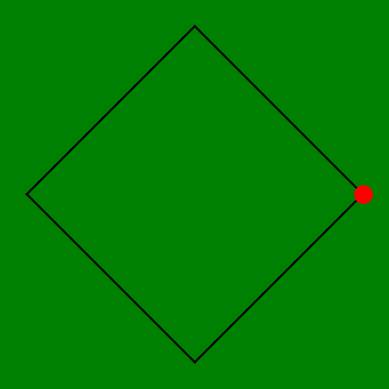

In [38]:
        
# draw the baseball diamond
plt.plot([0, 1], [0, 1], color = "black");
plt.plot([1, 0], [1, 2], color = "black");
plt.plot([0, -1], [2, 1], color = "black");
plt.plot([-1, 0], [1, 0], color = "black");

# make the axes square
plt.axis("square");

# put a runner on first
plt.plot([1], [1], color = "red", marker=".", markersize=25);

# turn off the axis
plt.axis("off");

# make the field green 
plt.gcf().set_facecolor('green')      # a better hexadecimal green: '#86eb34'

## Seaborn!

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

I.e., it is built on top of of matplotlib but produces better looking plots that are easier to create. 

Let's start by examining different themes which can produce better looking plots. We can do this using the `sns.set_theme()` method. 


In [9]:
# Import seaborn
import seaborn as sns

# Apply the default theme




# Side note: Matplotlib also has themes
# plt.style.available
# plt.style.use('fivethirtyeight')


# Re-create a line plot of gas prices over time here





### Plotting relationships between two quantitative variables

We can plot relationships between two quantitative variables using the `sns.relplot()` function


In [13]:
# plot relationship between budget and revenue (domgross_2013)



#### Penguins!

Let's continue to explore the relplot using data on penguins. 

We will also look at mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [41]:
# Let's look at some penguins
penguins = sns.load_dataset("penguins")

print(type(penguins))

penguins.head()


<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
# plotting bill size on x, and y axes and other properties








### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


In [11]:
# plot the flipper length






### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


In [12]:
# plot flipper length for the different species using different kinds of plots






# also try “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, or “bar”

<img src = "https://i.imgflip.com/1ezfdq.jpg">